# Introduction

Model to predict Airbnb price for listings.

In [ ]:
# libraries for analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluation libraries
from sklearn.model_selection import train_test_split

# Supervised learning libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegresso1git
from sklearn.ensemble import ExtraTreesRegressor

import warnings
  
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore')

## Data Preprocessing

In [32]:
# Importing dataset
dataset = pd.read_csv("airbnb.csv", on_bad_lines='skip')
dataset.head(1)

,Unnamed: 0,neighborhood_overview,host_name,host_location,host_about,host_response_time,host_verifications,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,0,Not even 10 minutes by metro from Victoria Sta...,Adriano,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home/apt,"[""Refrigerator"", ""Kitchen"", ""Crib"", ""Dedicated...",0,4,1,3,105.0,2,192,91.0,1


In [33]:
# removing the first Unnamed index column
dataset =  dataset.iloc[: , 1:]

In [34]:
dataset.head(2)

,neighborhood_overview,host_name,host_location,host_about,host_response_time,host_verifications,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,Not even 10 minutes by metro from Victoria Sta...,Adriano,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home/apt,"[""Refrigerator"", ""Kitchen"", ""Crib"", ""Dedicated...",0,4,1,3,105.0,2,192,91.0,1
1,Finsbury Park is a friendly melting pot commun...,Alina,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,"['email', 'phone', 'facebook', 'reviews', 'off...","Islington, Greater London, United Kingdom",Private room in apartment,Private room,"[""Long term stays allowed"", ""Lock on bedroom d...",0,2,1,1,40.0,1,21,97.0,0


In [35]:
# inspecting datatype and comparing to data dictionary
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76606 entries, 0 to 76605
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neighborhood_overview  47173 non-null  object 
 1   host_name              76606 non-null  object 
 2   host_location          76426 non-null  object 
 3   host_about             42759 non-null  object 
 4   host_response_time     36933 non-null  object 
 5   host_verifications     76606 non-null  object 
 6   neighbourhood          47174 non-null  object 
 7   property_type          76606 non-null  object 
 8   room_type              76606 non-null  object 
 9   amenities              76606 non-null  object 
 10  host_is_superhost      76606 non-null  int64  
 11  accommodates           76606 non-null  int64  
 12  bedrooms               76606 non-null  int64  
 13  beds                   76606 non-null  int64  
 14  price                  76606 non-null  float64
 15  mi

In [36]:
# Accessing the null values in dataset
dataset.isnull().sum()

neighborhood_overview    29433
host_name                    0
host_location              180
host_about               33847
host_response_time       39673
host_verifications           0
neighbourhood            29432
property_type                0
room_type                    0
amenities                    0
host_is_superhost            0
accommodates                 0
bedrooms                     0
beds                         0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating     23945
instant_bookable             0
dtype: int64

Superhosts have a 4.8 or higher average overall rating based on reviews from their Airbnb guests in the past year. Guests know they can expect outstanding hospitality from these Hosts ["AirBnB UK"](https://www.airbnb.co.uk/d/superhost#:~:text=Superhosts%20have%20a%204.8%20or,outstanding%20hospitality%20from%20these%20Hosts.)

Superhost availability is an important part of the features, it suggests it will elevate the pricing based on "perception" but it will be reviewed further from data to determine if it has strong correlation. 

In [37]:
# Dropping features that will have no impact on outcome at sight view
new_data = dataset.drop(['neighborhood_overview', 'host_name', 'host_about', 'host_response_time', 
                         'host_verifications', 'number_of_reviews'], axis= 1)

In [38]:
new_data

,host_location,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,review_scores_rating,instant_bookable
0,"London, England, United Kingdom","London, United Kingdom",Entire apartment,Entire home/apt,"[""Refrigerator"", ""Kitchen"", ""Crib"", ""Dedicated...",0,4,1,3,105.0,2,91.0,1
1,"London, England, United Kingdom","Islington, Greater London, United Kingdom",Private room in apartment,Private room,"[""Long term stays allowed"", ""Lock on bedroom d...",0,2,1,1,40.0,1,97.0,0
2,"Kensington, England, United Kingdom","London, United Kingdom",Entire apartment,Entire home/apt,"[""Refrigerator"", ""Wifi"", ""Heating"", ""Dishes an...",0,2,1,1,75.0,10,96.0,1
3,"London, England, United Kingdom","London, Fitzrovia, United Kingdom",Entire apartment,Entire home/apt,"[""Long term stays allowed"", ""Elevator"", ""Heati...",1,6,3,3,307.0,4,94.0,0
4,"London, England, United Kingdom","London, United Kingdom",Private room in townhouse,Private room,"[""TV"", ""Hair dryer"", ""Lock on bedroom door"", ""...",0,2,1,1,150.0,3,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76601,"London, England, United Kingdom",NaN,Entire condominium,Entire home/apt,"[""TV"", ""Hair dryer"", ""Washer"", ""Smoke alarm"", ...",0,4,2,2,189.0,3,NaN,1
76602,"London, England, United Kingdom",NaN,Entire condominium,Entire home/apt,"[""Essentials"", ""Dryer"", ""Smoke alarm"", ""Shampo...",0,2,1,1,149.0,3,100.0,1
76603,GB,"Greater London, England, United Kingdom",Entire apartment,Entire home/apt,"[""Long term stays allowed"", ""Heating"", ""Extra ...",0,4,2,4,273.0,4,NaN,0
76604,GB,"Greater London, England, United Kingdom",Entire apartment,Entire home/apt,"[""Long term stays allowed"", ""Heating"", ""Extra ...",0,4,2,2,433.0,3,NaN,0


### Handling Missing Data

In [39]:
new_data.isna().sum()

host_location             180
neighbourhood           29432
property_type               0
room_type                   0
amenities                   0
host_is_superhost           0
accommodates                0
bedrooms                    0
beds                        0
price                       0
minimum_nights              0
review_scores_rating    23945
instant_bookable            0
dtype: int64

In [40]:
# mean was used here to replace missing values because we are looking for the competitive price of airbnb
# in the market where ratings play a role in peception
new_data['review_scores_rating'].mean()

93.0425552116367

In [41]:
new_data['review_scores_rating'].fillna(93, inplace=True)

In [42]:
# inspecting changes
new_data.isna().sum()

host_location             180
neighbourhood           29432
property_type               0
room_type                   0
amenities                   0
host_is_superhost           0
accommodates                0
bedrooms                    0
beds                        0
price                       0
minimum_nights              0
review_scores_rating        0
instant_bookable            0
dtype: int64

In [43]:
new_data[new_data['host_location'].isnull()]

,host_location,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,review_scores_rating,instant_bookable
5746,NaN,NaN,Private room in apartment,Private room,"[""TV"", ""Wifi"", ""Heating"", ""Smoke alarm"", ""Wash...",0,2,1,1,40.0,1,93.0,0
9060,NaN,NaN,Private room in apartment,Private room,"[""Wifi"", ""Shampoo"", ""Essentials"", ""Smoke alarm...",0,2,1,1,50.0,10,93.0,0
10552,NaN,"London, United Kingdom",Entire apartment,Entire home/apt,"[""Shampoo"", ""Hangers"", ""Wifi"", ""Essentials"", ""...",0,6,2,2,220.0,7,93.0,0
10966,NaN,NaN,Entire apartment,Entire home/apt,"[""Wifi"", ""Elevator"", ""Smoke alarm"", ""TV"", ""Iro...",0,4,2,2,150.0,1,93.0,0
11486,NaN,NaN,Private room in house,Private room,"[""Heating"", ""Kitchen"", ""Lock on bedroom door"",...",0,1,1,1,17.0,1,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74630,NaN,"Greater London, England, United Kingdom",Entire house,Entire home/apt,"[""First aid kit"", ""TV"", ""Hair dryer"", ""Washer""...",0,4,2,2,100.0,10,93.0,0
74782,NaN,NaN,Entire house,Entire home/apt,"[""First aid kit"", ""Hair dryer"", ""Oven"", ""Washe...",0,10,5,6,1200.0,3,93.0,0
75954,NaN,NaN,Private room in apartment,Private room,"[""First aid kit"", ""TV"", ""Lock on bedroom door""...",0,1,1,1,25.0,7,93.0,1
76082,NaN,"Greater London, England, United Kingdom",Entire apartment,Entire home/apt,"[""Long term stays allowed"", ""Pour-over coffee""...",0,6,2,2,185.0,2,100.0,1


In [45]:
# replacing nan with '?' which will be later replaced with the corresponding values in @neighbourhood; 
# a relative feature in dataset
new_data['host_location'].fillna('?', inplace=True)

new_data['neighbourhood'].fillna('?', inplace=True)

In [46]:
aligned_ij = []
for i, j in zip(new_data['host_location'], new_data['neighbourhood']):
    if i == "?" and j != "?":
        aligned_ij.append(j)

In [48]:
# 77 corresponding data from neighbourhood features that aligns with host_location
len(aligned_ij)

77

In [49]:
# There are 171 missing data in host_location, this can be further reduced by fillng the nan values with "neighbourhood" data
# replacing "?" in host_location with 77 available corresponding data from neighnourhood

for i, j in zip(new_data['host_location'], new_data['neighbourhood']) :
    if i == "?" and j != "?":
        new_data['host_location'] = np.where(new_data['host_location'] == "?"
                                             , new_data['neighbourhood'], new_data['host_location'])

In [50]:
#inspecting results
new_data.loc[(new_data['host_location'] == "?")]

,host_location,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,review_scores_rating,instant_bookable
5746,?,?,Private room in apartment,Private room,"[""TV"", ""Wifi"", ""Heating"", ""Smoke alarm"", ""Wash...",0,2,1,1,40.0,1,93.0,0
9060,?,?,Private room in apartment,Private room,"[""Wifi"", ""Shampoo"", ""Essentials"", ""Smoke alarm...",0,2,1,1,50.0,10,93.0,0
10966,?,?,Entire apartment,Entire home/apt,"[""Wifi"", ""Elevator"", ""Smoke alarm"", ""TV"", ""Iro...",0,4,2,2,150.0,1,93.0,0
11486,?,?,Private room in house,Private room,"[""Heating"", ""Kitchen"", ""Lock on bedroom door"",...",0,1,1,1,17.0,1,40.0,0
12225,?,?,Entire apartment,Entire home/apt,"[""TV"", ""Dedicated workspace"", ""Heating"", ""Cabl...",0,1,1,1,100.0,1,93.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73500,?,?,Entire apartment,Entire home/apt,"[""Essentials"", ""Dryer"", ""Smoke alarm"", ""Carbon...",0,2,1,1,50.0,1,100.0,0
73586,?,?,Private room in apartment,Private room,"[""First aid kit"", ""TV"", ""Hair dryer"", ""Private...",0,1,1,1,30.0,1,93.0,0
73960,?,?,Entire apartment,Entire home/apt,"[""Washer"", ""Essentials"", ""Wifi"", ""Kitchen"", ""S...",0,2,1,1,59.0,1,100.0,1
74782,?,?,Entire house,Entire home/apt,"[""First aid kit"", ""Hair dryer"", ""Oven"", ""Washe...",0,10,5,6,1200.0,3,93.0,0


In [19]:
# dropping  attribute neighbourhood at the column level
# dropping 103 rows with "?" from data at the row level

In [51]:
new_data.drop(['neighbourhood'], axis= 1, inplace= True)

In [52]:
# rows with "?" deleted
new_data.drop(new_data[new_data['host_location'] == "?"].index, axis= 0, inplace = True)

### Text Cleaning

In [56]:
import re

In [54]:
enableStopwords = True
if enableStopwords:
    new_data['amenities'] = new_data['amenities'].str.replace('!@\#$%|~^".&*/', "", regex=False)
    new_data.head(2)

In [57]:
# Remove punctuation
new_data['host_location'] = new_data['host_location'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
' ', x))
# df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
# ' ', x)) #Adding another layer of characters to be removed
# Convert the titles to lowercase
new_data['host_location'] = new_data['host_location'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(new_data['host_location'].apply(str).head())

0        london  england  united kingdom
1        london  england  united kingdom
2    kensington  england  united kingdom
3        london  england  united kingdom
4        london  england  united kingdom
Name: host_location, dtype: object


In [58]:
# Remove punctuation
new_data['property_type'] = new_data['property_type'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
' ', x))
# df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
# ' ', x)) #Adding another layer of characters to be removed
# Convert the titles to lowercase
new_data['property_type'] = new_data['property_type'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(new_data['property_type'].apply(str).head())

0             entire apartment
1    private room in apartment
2             entire apartment
3             entire apartment
4    private room in townhouse
Name: property_type, dtype: object


In [59]:
# Remove punctuation
new_data['room_type'] = new_data['room_type'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
' ', x))
# df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
# ' ', x)) #Adding another layer of characters to be removed
# Convert the titles to lowercase
new_data['room_type'] = new_data['room_type'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(new_data['room_type'].apply(str).head())

0    entire home apt
1       private room
2    entire home apt
3    entire home apt
4       private room
Name: room_type, dtype: object


In [60]:
# Remove punctuation
new_data['amenities'] = new_data['amenities'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
' ', x))
# df['review'] = df['review'].apply(str).map(lambda x: re.sub('[^a-zA-Z]',
# ' ', x)) #Adding another layer of characters to be removed
# Convert the titles to lowercase
new_data['amenities'] = new_data['amenities'].apply(str).map(lambda x: x.lower())
# Print out the first rows of reviews
print(new_data['amenities'].apply(str).head())

0      refrigerator    kitchen    crib    dedicated...
1      long term stays allowed    lock on bedroom d...
2      refrigerator    wifi    heating    dishes an...
3      long term stays allowed    elevator    heati...
4      tv    hair dryer    lock on bedroom door    ...
Name: amenities, dtype: object


In [61]:
new_data['amenities'] = [str (item) for item in new_data['amenities']]

In [62]:
new_data['room_type'] = [str (item) for item in new_data['room_type']]

In [63]:
new_data['property_type'] = [str (item) for item in new_data['property_type']]

In [64]:
new_data['host_location'] = [str (item) for item in new_data['host_location']]

In [65]:
new_data.iloc[:, 0:4]

,host_location,property_type,room_type,amenities
0,london england united kingdom,entire apartment,entire home apt,refrigerator kitchen crib dedicated...
1,london england united kingdom,private room in apartment,private room,long term stays allowed lock on bedroom d...
2,kensington england united kingdom,entire apartment,entire home apt,refrigerator wifi heating dishes an...
3,london england united kingdom,entire apartment,entire home apt,long term stays allowed elevator heati...
4,london england united kingdom,private room in townhouse,private room,tv hair dryer lock on bedroom door ...
...,...,...,...,...
76601,london england united kingdom,entire condominium,entire home apt,tv hair dryer washer smoke alarm ...
76602,london england united kingdom,entire condominium,entire home apt,essentials dryer smoke alarm shampo...
76603,gb,entire apartment,entire home apt,long term stays allowed heating extra ...
76604,gb,entire apartment,entire home apt,long term stays allowed heating extra ...


### Encoding Categorical variables

### Exploring relationships between Categorical Data

Hypothesis <br>
Null Hypothesis (Ho) — There is no relationship between features <br>


Alternate Hypothesis (Ha) — There is a relationship between features

In [66]:
## Importing required libraries
import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

In [67]:
new_data.columns

Index(['host_location', 'property_type', 'room_type', 'amenities',
       'host_is_superhost', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'review_scores_rating', 'instant_bookable'],
      dtype='object')

In [68]:
# rearranging dataframe to move label 'price' to the last column
new_data = new_data[['host_location', 'property_type', 'room_type', 'amenities',
       'host_is_superhost', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'review_scores_rating', 'instant_bookable', 'price']]

In [69]:
## Creating a DataFrame with all categorical variables
df_cat = pd.DataFrame(data = new_data.dtypes, columns = 
                                         ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

df_cat = new_data[cat_var]
df_cat.head()

,host_location,property_type,room_type,amenities
0,london england united kingdom,entire apartment,entire home apt,refrigerator kitchen crib dedicated...
1,london england united kingdom,private room in apartment,private room,long term stays allowed lock on bedroom d...
2,kensington england united kingdom,entire apartment,entire home apt,refrigerator wifi heating dishes an...
3,london england united kingdom,entire apartment,entire home apt,long term stays allowed elevator heati...
4,london england united kingdom,private room in townhouse,private room,tv hair dryer lock on bedroom door ...


In [70]:
## Let us split this list into two parts
cat_var1 = ('host_location', 'property_type', 'room_type', 'amenities')
cat_var2 = ('host_location', 'property_type', 'room_type', 'amenities')
## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [71]:
cat_var_prod

[('host_location', 'host_location'),
 ('host_location', 'property_type'),
 ('host_location', 'room_type'),
 ('host_location', 'amenities'),
 ('property_type', 'host_location'),
 ('property_type', 'property_type'),
 ('property_type', 'room_type'),
 ('property_type', 'amenities'),
 ('room_type', 'host_location'),
 ('room_type', 'property_type'),
 ('room_type', 'room_type'),
 ('room_type', 'amenities'),
 ('amenities', 'host_location'),
 ('amenities', 'property_type'),
 ('amenities', 'room_type'),
 ('amenities', 'amenities')]

In [72]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_cat[i[0]], df_cat[i[1]])))[1]))

In [73]:
result

[('host_location', 'property_type', 0.0),
 ('host_location', 'room_type', 5.517547912066074e-73),
 ('host_location', 'amenities', 0.0),
 ('property_type', 'host_location', 0.0),
 ('property_type', 'room_type', 0.0),
 ('property_type', 'amenities', 0.0),
 ('room_type', 'host_location', 5.517547912066074e-73),
 ('room_type', 'property_type', 0.0),
 ('room_type', 'amenities', 6.219585827019745e-14),
 ('amenities', 'host_location', 0.0),
 ('amenities', 'property_type', 0.0),
 ('amenities', 'room_type', 6.219585827019745e-14)]

In [74]:
# creating a table for our results
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", 
                                                       "coeff"])
## Using pivot function to convert the above DataFrame into a crosstab
chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,amenities,host_location,property_type,room_type
var1,,,,
amenities,NaN,0.000000e+00,0.0,6.219586e-14
host_location,0.000000e+00,NaN,0.0,5.517548e-73
property_type,0.000000e+00,0.000000e+00,NaN,0.000000e+00
room_type,6.219586e-14,5.517548e-73,0.0,NaN


Note: There exists a relationship between two variables if p value ≤ 0.05. <br>
There p-value as seen from the table shows a strong relationship between all combinations which suggests a strong Multicollinearity.
[Multicollinearity]("https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences.) is a statistical concept where several independent variables in a model are correlated") <br>

It is safe to remove atleast two of this features and it will not impact negatively the outcome of our model.

### Exploring relationships between numerical features

In [75]:
new_data.iloc[:, 4:-1]

,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable
0,0,4,1,3,2,91.0,1
1,0,2,1,1,1,97.0,0
2,0,2,1,1,10,96.0,1
3,1,6,3,3,4,94.0,0
4,0,2,1,1,3,93.0,0
...,...,...,...,...,...,...,...
76601,0,4,2,2,3,93.0,1
76602,0,2,1,1,3,100.0,1
76603,0,4,2,4,4,93.0,0
76604,0,4,2,2,3,93.0,0


In [76]:
# numeric features correlation table
num_var = new_data.iloc[:, 4:-1]
num_var.corr()

,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable
host_is_superhost,1.000000,-0.012503,-0.027680,-0.010687,0.000395,0.179024,-0.026395
accommodates,-0.012503,1.000000,0.796789,0.819381,-0.003679,-0.029475,-0.006999
bedrooms,-0.027680,0.796789,1.000000,0.781770,0.011921,0.010835,-0.037837
beds,-0.010687,0.819381,0.781770,1.000000,0.001788,-0.021956,0.000275
minimum_nights,0.000395,-0.003679,0.011921,0.001788,1.000000,0.002888,-0.024399
review_scores_rating,0.179024,-0.029475,0.010835,-0.021956,0.002888,1.000000,-0.088357
instant_bookable,-0.026395,-0.006999,-0.037837,0.000275,-0.024399,-0.088357,1.000000


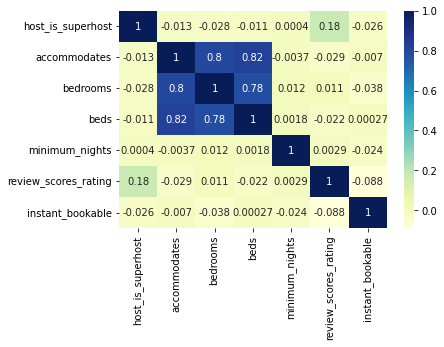

In [77]:
dataplot = sns.heatmap(num_var.corr(), cmap="YlGnBu", annot=True)
plt.show()

Using 80% or higher as a base to represent either positive or negative relationship between features. The correlation map reveals strong relationship between "accommodates", "bedrooms", "beds". We may confidently leave out 
one of these three in our model training, it will likely not impact the outcome of the model. However, it is imperative to conduct another test for confirmation for consistency using p value ≤ 0.05 as implemented in categorical variables in a pairwise ttest.

In [78]:
## Creating a pairwise combination with all numeric features
import itertools
s = itertools.combinations(num_var, 2)
s = list(s)
print(s)

[('host_is_superhost', 'accommodates'), ('host_is_superhost', 'bedrooms'), ('host_is_superhost', 'beds'), ('host_is_superhost', 'minimum_nights'), ('host_is_superhost', 'review_scores_rating'), ('host_is_superhost', 'instant_bookable'), ('accommodates', 'bedrooms'), ('accommodates', 'beds'), ('accommodates', 'minimum_nights'), ('accommodates', 'review_scores_rating'), ('accommodates', 'instant_bookable'), ('bedrooms', 'beds'), ('bedrooms', 'minimum_nights'), ('bedrooms', 'review_scores_rating'), ('bedrooms', 'instant_bookable'), ('beds', 'minimum_nights'), ('beds', 'review_scores_rating'), ('beds', 'instant_bookable'), ('minimum_nights', 'review_scores_rating'), ('minimum_nights', 'instant_bookable'), ('review_scores_rating', 'instant_bookable')]


In [79]:
result_2 = []
for i in s:
    if i[0] != i[1]:
        result_2.append(ss.ttest_ind(
                            num_var[i[0]], num_var[i[1]]))

In [80]:
result_2

[Ttest_indResult(statistic=-411.56538112934373, pvalue=0.0),
 Ttest_indResult(statistic=-402.5668814786387, pvalue=0.0),
 Ttest_indResult(statistic=-349.5526524152652, pvalue=0.0),
 Ttest_indResult(statistic=-63.86156688402281, pvalue=0.0),
 Ttest_indResult(statistic=-2938.389904254917, pvalue=0.0),
 Ttest_indResult(statistic=-102.73825393405988, pvalue=0.0),
 Ttest_indResult(statistic=211.10735171634167, pvalue=0.0),
 Ttest_indResult(statistic=160.61869487381773, pvalue=0.0),
 Ttest_indResult(statistic=-26.51667665899707, pvalue=1.3961159183568573e-154),
 Ttest_indResult(statistic=-2781.2788565009264, pvalue=0.0),
 Ttest_indResult(statistic=375.14140008615874, pvalue=0.0),
 Ttest_indResult(statistic=-52.77417702457807, pvalue=0.0),
 Ttest_indResult(statistic=-47.06209346133888, pvalue=0.0),
 Ttest_indResult(statistic=-2886.054270218887, pvalue=0.0),
 Ttest_indResult(statistic=314.5332414759176, pvalue=0.0),
 Ttest_indResult(statistic=-43.44682650604507, pvalue=0.0),
 Ttest_indResult(s

The result_2 above shows that the pariwise combination of all features in a pairwise ttest are statistically significant 
with p-value <= 0.05. 


## Post Hoc Test
This test is to double check the result of the assertion the ttest made that there is strong relationship between features.

## Bonferroni Test

This test is used to reduce the alpha further by dividing the default alpha (0.05) by the number of pairings 
to test the relationship between the features.

In [81]:
Bonferrini_corrected_alpha = 0.05/21
print('The new alpha is: ', Bonferrini_corrected_alpha)

The new alpha is:  0.002380952380952381


In [82]:
p_value = []
for i in (result_2):
    if i[1] <= Bonferrini_corrected_alpha:
            print("Test rejects H0 and accepts H1", i)
            
    else:
        print("Tests fails to reject Null Hypothesis(H0), --None is equal to or less than 0.0024")

Test rejects H0 and accepts H1 Ttest_indResult(statistic=-411.56538112934373, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-402.5668814786387, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-349.5526524152652, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-63.86156688402281, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-2938.389904254917, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-102.73825393405988, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=211.10735171634167, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=160.61869487381773, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-26.51667665899707, pvalue=1.3961159183568573e-154)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=-2781.2788565009264, pvalue=0.0)
Test rejects H0 and accepts H1 Ttest_indResult(statistic=375.14140008615874, pvalue=0.0

### Exploratory Analysis

<AxesSubplot:xlabel='room_type', ylabel='price'>

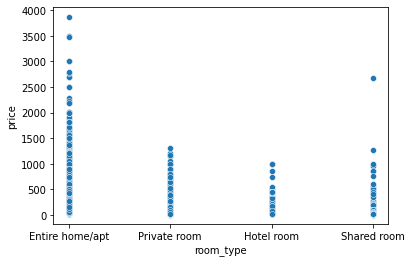

In [269]:
# The most sought after room type
sns.scatterplot(data=dataset, x="room_type", y="price")

In [286]:
numeric_dataset.columns

Index(['host_location_0', 'host_location_1', 'host_location_2',
       'host_location_3', 'host_location_4', 'host_location_5',
       'host_location_6', 'host_location_7', 'host_location_8',
       'host_location_9', 'host_location_10', 'host_location_11',
       'property_type_0', 'property_type_1', 'property_type_2',
       'property_type_3', 'property_type_4', 'property_type_5',
       'property_type_6', 'room_type_0', 'room_type_1', 'room_type_2',
       'amenities_0', 'amenities_1', 'amenities_2', 'amenities_3',
       'amenities_4', 'amenities_5', 'amenities_6', 'amenities_7',
       'amenities_8', 'amenities_9', 'amenities_10', 'amenities_11',
       'amenities_12', 'amenities_13', 'amenities_14', 'amenities_15',
       'amenities_16', 'host_is_superhost', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'review_scores_rating', 'instant_bookable'],
      dtype='object')

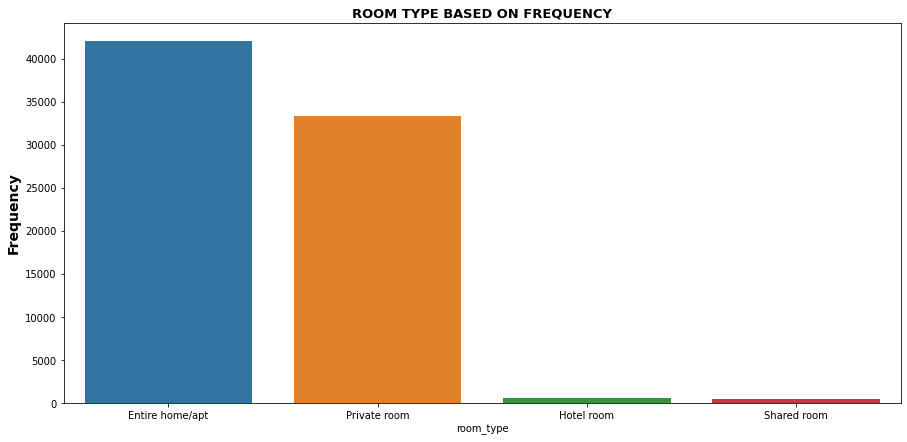

In [301]:
# most sought after listing (room type)
plt.figure(figsize=(15, 7))
ax = sns.countplot(
    "room_type",
    data=new_data,
    order=new_data["room_type"].value_counts().index,
    palette="tab10",
)
ax.set_xticklabels(
    [
        "Entire home/apt",
        "Private room",
        "Hotel room",
        "Shared room",
    ]
)
plt.title(
    "ROOM TYPE BASED ON FREQUENCY",
    fontsize=13,
    fontweight="bold",
)
plt.ylabel("Frequency", fontsize=14, fontweight="bold")
plt.show()

In [194]:
new_data.columns

Index(['host_location', 'property_type', 'room_type', 'amenities',
       'host_is_superhost', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'review_scores_rating', 'instant_bookable', 'price'],
      dtype='object')

In [195]:
# creating a dataframe of host_location and price to develop some visuals and show relationship
location_price = new_data[["host_location", "minimum_nights", "price"]]

In [196]:
location_price.value_counts()

host_location                    minimum_nights  price
london  england  united kingdom  1               40.0     452
                                                 50.0     432
                                                 35.0     381
                                                 30.0     371
                                                 45.0     318
                                                         ... 
hove  england  united kingdom    15              78.0       1
                                 30              111.0      1
hu                               1               42.0       1
                                 2               50.0       1
zurich  zurich  switzerland      5               25.0       1
Length: 20344, dtype: int64

In [ ]:
# The minimum night according to data is not tied to the number of time spent to determine price; 
# there are not mutually exclusive with price and so average price can not be derived with minimum night count as a condition

In [198]:
# Average price
Avg_price = location_price.price.mean()
print(f"Average Airbnb Price: {Avg_price} ")

Average Airbnb Price: 107.50739670339725 


In [210]:
# price, location and minimum night of listings when price is greater than 50 and less than the average price  
mid_price = location_price[(location_price['price'] > 50) & (location_price['price'] <= 107.507) ].value_counts()
mid_price

host_location                     minimum_nights  price
london  england  united kingdom   2               100.0    315
                                  1               60.0     306
                                  2               60.0     237
                                  1               100.0    232
                                  2               80.0     229
                                                          ... 
instow  england  united kingdom   2               100.0      1
ipswich  england  united kingdom  2               60.0       1
ireland                           1               65.0       1
                                                  75.0       1
zurich  zurich  switzerland       4               100.0      1
Length: 5853, dtype: int64

In [213]:
# converting series to frame
mid_price = mid_price.to_frame()
mid_price

0
host_location                    minimum_nights price     
london  england  united kingdom  2              100.0  315
                                 1              60.0   306
                                 2              60.0   237
                                 1              100.0  232
                                 2              80.0   229
...                                                    ...
instow  england  united kingdom  2              100.0    1
ipswich  england  united kingdom 2              60.0     1
ireland                          1              65.0     1
                                                75.0     1
zurich  zurich  switzerland      4              100.0    1

[5853 rows x 1 columns]

In [217]:
# saving lettings with mid_price to file

with open('mid_price.csv', 'w') as csv_file:
    mid_price.to_csv(path_or_buf=csv_file)

In [205]:
# areas with cheapest listing
location_price[location_price['price'] <= 50].value_counts()

host_location                         minimum_nights  price
london  england  united kingdom       1               40.0     452
                                                      50.0     432
                                                      35.0     381
                                                      30.0     371
                                                      45.0     318
                                                              ... 
hersham  england  united kingdom      5               21.0       1
heston  england  united kingdom       1               49.0       1
heston  middx  uk                     2               35.0       1
high barnet  england  united kingdom  1               30.0       1
zurich  zurich  switzerland           5               25.0       1
Length: 5442, dtype: int64

In [375]:
# top ten areas with cheapest listing (price < 50)
location_price[location_price['price'] <= 50].value_counts()[:10]

host_location                    minimum_nights  price
london  england  united kingdom  1               40.0     452
                                                 50.0     432
                                                 35.0     381
                                                 30.0     371
                                                 45.0     318
                                 2               50.0     293
                                                 40.0     283
                                 1               25.0     264
                                 2               45.0     250
                                                 35.0     228
dtype: int64

In [265]:
london_count = dataset["host_location"].str.contains('London').sum()
if london_count > 0:
    print ("There are {m} london out of 76503 rows".format(m=london_count))

There are 46696 london out of 76503 rows


In [260]:
((76503/46696 ) - 1 ) * 100

63.832019873222556

In [268]:
dataset.columns

Index(['neighborhood_overview', 'host_name', 'host_location', 'host_about',
       'host_response_time', 'host_verifications', 'neighbourhood',
       'property_type', 'room_type', 'amenities', 'host_is_superhost',
       'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable'],
      dtype='object')

In [332]:
# Most expensive listing is found in Thrapston, England, United Kingdom
new_data[new_data["price"] == new_data["price"].max()]

,host_location,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable,price
62224,thrapston england united kingdom,entire serviced apartment,entire home apt,washer hangers kitchen dryer ded...,0,9,4,4,1,93.0,1,3872.0


### How does instant booking contribute to price setting?

According to the data, instant booking  contributes only 0.75% of the price increase over average price

In [315]:
instant_booking = new_data[["price", "instant_bookable"]]

In [319]:
# inpecting instant_bookable contribution to price
instant_booking_review = instant_booking[(instant_booking['price'] > 107.507) & 
                                         (instant_booking['instant_bookable'] == 1) ].value_counts()

instant_booking_review

price   instant_bookable
150.0   1                   440
120.0   1                   409
200.0   1                   256
110.0   1                   251
130.0   1                   196
                           ... 
605.0   1                     1
614.0   1                     1
618.0   1                     1
625.0   1                     1
3872.0  1                     1
Length: 574, dtype: int64

In [328]:
# instant bookable contribution to price
(574/76503) * 100

0.7502973739591912

### How does superhost contribute to price setting?

According to the data, superhost contributes only 0.48% of the price increase over average price

In [329]:
super_hosting = new_data[["price", "host_is_superhost"]]

In [330]:
# inpecting super-host contribution to price
super_hosting_review = super_hosting[(super_hosting['price'] > 107.507) & 
                                         (super_hosting['host_is_superhost'] == 1) ].value_counts()

super_hosting_review

price   host_is_superhost
120.0   1                    185
150.0   1                    170
110.0   1                    118
200.0   1                     97
140.0   1                     91
                            ... 
274.0   1                      1
419.0   1                      1
418.0   1                      1
415.0   1                      1
3471.0  1                      1
Length: 371, dtype: int64

In [331]:
# superhost contribution to price increase
(371/76503) * 100

0.48494830268094063

In [369]:
#converting contributions to a dataframe
contribution_table = {'instant_bookable_%': [0.75], 'super_hosting_%': [0.48], 'pets_allowed_%': [73]}
contribution_table = pd.DataFrame.from_dict(contribution_table)
contribution_table

,instant_bookable_%,super_hosting_%,pets_allowed_%
0,0.75,0.48,73


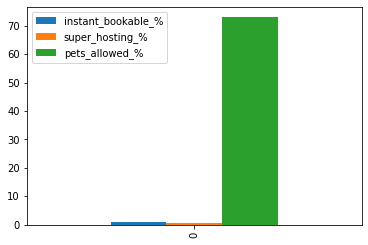

In [372]:
contribution_table.plot.bar()
plt.show()

### How does Pet Hosting contribute to price setting

In [345]:
# number of listing with pets string in data
pets = dataset.loc[dataset['amenities'].str.contains("pet", case=False)]
pets

,neighborhood_overview,host_name,host_location,host_about,host_response_time,host_verifications,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
789,The building is 5 minutes' walk from Upper Str...,Veri,"London, England, United Kingdom","Italian, based in London since 2010. I work as...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'govern...","London, United Kingdom",Entire apartment,Entire home/apt,"[""Dishwasher"", ""Self check-in"", ""Wifi"", ""Bathr...",1,4,1,1,90.0,3,93,97.0,1
1424,The flat is in a great area for socialising—lo...,Joanna,"Dorking, England, United Kingdom",I have worked within property....for years and...,within an hour,"['email', 'phone', 'facebook', 'reviews', 'jum...","London, United Kingdom",Entire apartment,Entire home/apt,"[""Bathroom essentials"", ""Hair dryer"", ""Garden ...",1,2,1,1,94.0,2,243,96.0,1
3036,"Close to the Thames and riverside pubs, the ap...",Jeff,"London, England, United Kingdom",Have worked in the music business for many yea...,within a few hours,"['email', 'phone', 'reviews', 'jumio', 'govern...","Chiswick, London, United Kingdom",Entire apartment,Entire home/apt,"[""TV"", ""Hair dryer"", ""Iron"", ""Washer"", ""Pets a...",0,5,3,4,295.0,3,37,98.0,0
3140,Greenwich has a great village feel with cool r...,Davey,"London, United Kingdom",I am an Australian living in London. I live be...,within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home/apt,"[""TV"", ""Hair dryer"", ""Dishwasher"", ""Washer"", ""...",1,4,2,2,159.0,3,231,99.0,0
5452,Notting Hill is home to the charming Portobell...,Desley,"Greater London, England, United Kingdom","An Australian living in London who loves film,...",NaN,"['email', 'phone', 'reviews', 'jumio', 'offlin...","Notting Hill, London, United Kingdom",Entire apartment,Entire home/apt,"[""Iron"", ""TV"", ""Bathroom essentials"", ""Pets al...",1,3,1,1,155.0,5,81,99.0,0
7077,"The house is located in South Tottenham, a div...",Orla,"London, United Kingdom",I like travelling to new places with my husban...,within an hour,"['email', 'phone', 'facebook', 'reviews', 'jum...","London, United Kingdom",Entire townhouse,Entire home/apt,"[""TV"", ""Hair dryer"", ""Dishwasher"", ""Washer"", ""...",0,4,2,2,110.0,5,28,94.0,0
7351,The flat is on a quiet residential street a sh...,Wendy,London,"I am from Montreal, grew up in Paris, and went...",NaN,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home/apt,"[""TV"", ""Coffee maker"", ""Smoke alarm"", ""Iron"", ...",0,4,2,2,200.0,4,29,100.0,0
9511,Barnes is rapidly becoming the area of choice ...,Alison,London,"Live life to the full! Enjoy friends, food, wi...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'govern...","London, United Kingdom",Entire guest suite,Entire home/apt,"[""TV"", ""Hair dryer"", ""Iron"", ""Washer"", ""Pets a...",1,2,1,1,243.0,2,60,98.0,0
10639,"Smirking along the banks of the Thames, pomp a...",VanZyl,"London, United Kingdom","I love travelling, it is an essential part of ...",within a few hours,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home/apt,"[""Carbon monoxide alarm"", ""Dryer"", ""Free stree...",1,5,2,2,311.0,3,73,94.0,0
12177,"Smack bang in the centre of South London, Brix...",Fran,England,"We love Airbnb, but we know that it can be ver...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire serviced apartment,Entire home/apt,"[""Full kitchen"", ""Game console"", ""TV"", ""Bathro...",0,4,2,2,119.0,3,30,96.0,0


In [346]:
len(pets)

41

In [350]:
pets_allowed = pets.loc[pets['amenities'].str.contains("pets allowed", case=False)]

In [351]:
len(pets_allowed)

41

In [355]:
# percentage of listing that allows pets 0.05%
(41/76503) * 100

0.05359266956851365

In [352]:
pets_allowed_review = pets_allowed[(pets_allowed['price'] > 107.507)]

pets_allowed_review

,neighborhood_overview,host_name,host_location,host_about,host_response_time,host_verifications,neighbourhood,property_type,room_type,amenities,host_is_superhost,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
3036,"Close to the Thames and riverside pubs, the ap...",Jeff,"London, England, United Kingdom",Have worked in the music business for many yea...,within a few hours,"['email', 'phone', 'reviews', 'jumio', 'govern...","Chiswick, London, United Kingdom",Entire apartment,Entire home/apt,"[""TV"", ""Hair dryer"", ""Iron"", ""Washer"", ""Pets a...",0,5,3,4,295.0,3,37,98.0,0
3140,Greenwich has a great village feel with cool r...,Davey,"London, United Kingdom",I am an Australian living in London. I live be...,within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home/apt,"[""TV"", ""Hair dryer"", ""Dishwasher"", ""Washer"", ""...",1,4,2,2,159.0,3,231,99.0,0
5452,Notting Hill is home to the charming Portobell...,Desley,"Greater London, England, United Kingdom","An Australian living in London who loves film,...",NaN,"['email', 'phone', 'reviews', 'jumio', 'offlin...","Notting Hill, London, United Kingdom",Entire apartment,Entire home/apt,"[""Iron"", ""TV"", ""Bathroom essentials"", ""Pets al...",1,3,1,1,155.0,5,81,99.0,0
7077,"The house is located in South Tottenham, a div...",Orla,"London, United Kingdom",I like travelling to new places with my husban...,within an hour,"['email', 'phone', 'facebook', 'reviews', 'jum...","London, United Kingdom",Entire townhouse,Entire home/apt,"[""TV"", ""Hair dryer"", ""Dishwasher"", ""Washer"", ""...",0,4,2,2,110.0,5,28,94.0,0
7351,The flat is on a quiet residential street a sh...,Wendy,London,"I am from Montreal, grew up in Paris, and went...",NaN,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home/apt,"[""TV"", ""Coffee maker"", ""Smoke alarm"", ""Iron"", ...",0,4,2,2,200.0,4,29,100.0,0
9511,Barnes is rapidly becoming the area of choice ...,Alison,London,"Live life to the full! Enjoy friends, food, wi...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'govern...","London, United Kingdom",Entire guest suite,Entire home/apt,"[""TV"", ""Hair dryer"", ""Iron"", ""Washer"", ""Pets a...",1,2,1,1,243.0,2,60,98.0,0
10639,"Smirking along the banks of the Thames, pomp a...",VanZyl,"London, United Kingdom","I love travelling, it is an essential part of ...",within a few hours,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire apartment,Entire home/apt,"[""Carbon monoxide alarm"", ""Dryer"", ""Free stree...",1,5,2,2,311.0,3,73,94.0,0
12177,"Smack bang in the centre of South London, Brix...",Fran,England,"We love Airbnb, but we know that it can be ver...",within an hour,"['email', 'phone', 'reviews', 'jumio', 'offlin...","London, United Kingdom",Entire serviced apartment,Entire home/apt,"[""Full kitchen"", ""Game console"", ""TV"", ""Bathro...",0,4,2,2,119.0,3,30,96.0,0
12636,"The home is in a friendly, residential family ...",Eliza,"London, England, United Kingdom",I work in luxury travel so am often on the go....,within an hour,"['email', 'phone', 'reviews', 'jumio', 'govern...","London, United Kingdom",Entire apartment,Entire home/apt,"[""TV"", ""Hair dryer"", ""Dishwasher"", ""Washer"", ""...",0,4,2,2,220.0,2,39,99.0,0
13364,Kensington is one of London's wealthiest and m...,Natasha & Trevor,"L-Iklin, Malta",I have worked in 5 star hotels for most of my ...,within an hour,"['email', 'phone', 'google', 'reviews', 'jumio...","London, England, United Kingdom",Entire apartment,Entire home/apt,"[""Full kitchen"", ""TV"", ""Bathroom essentials"", ...",0,4,2,2,175.0,2,54,95.0,0


In [353]:
# no of pets_allowed listings with price over the average price 30
len(pets_allowed_review)

30

In [354]:
# pets allowed contribution to price increase on listings that allows pets - 73%
(30/41) * 100

73.17073170731707

### Encoding Categorical Variables

In [83]:
new_data.shape

(76503, 12)

In [85]:
from category_encoders import *

In [84]:
X = new_data.iloc[0:76503, 0:11]
y = new_data.iloc[:, -1]

In [86]:
# Encoding categorical variables
encoder = BinaryEncoder(cols=['host_location', 'room_type', 'property_type', 'amenities']).fit(X)

In [87]:
encoder

BinaryEncoder(cols=['host_location', 'room_type', 'property_type', 'amenities'],
              mapping=[{'col': 'host_location',
                        'mapping':        host_location_0  host_location_1  host_location_2  host_location_3  \
 1                   0                0                0                0   
 2                   0                0                0                0   
 3                   0                0                0                0   
 4                   0                0                0                0   
 5                   0                0                0                0   
...                ...              ...              ...              ...   
 2353                1                0                0                1   
 2354                1                0                0                1   
 2355                1                0                0                1   
-1                   0                0                0                0   
-2                   0                0                0                0   

       host_location_4  host_location_5  host_location_6  host_location_7  \
 1                   0                0                0                0   
 2                   0                0                0                0   
 3                   0                0                0                0   
 4                   0                0                0                0   
 5                   0                0                0                0   
...                ...              .....
        amenities_5  amenities_6  amenities_7  amenities_8  amenities_9  \
 1                0            0            0            0            0   
 2                0            0            0            0            0   
 3                0            0            0            0            0   
 4                0            0            0            0            0   
 5                0            0            0            0            0   
...             ...          ...          ...          ...          ...   
 71262            0            1            1            0            0   
 71263            0            1            1            0            0   
 71264            0            1            1            0            0   
-1                0            0            0            0            0   
-2                0            0            0            0            0   

        amenities_10  amenities_11  amenities_12  amenities_13  amenities_14  \
 1                 0             0             0             0             0   
 2                 0             0             0             0             0   
 3                 0             0             0             0             0   
 4                 0             0             0             0             1   
 5                 0             0             0             0             1   
...              ...           ...           ...           ...           ...   
 71262             1             0             1             1             1   
 71263             1             0             1             1             1   
 71264             1             1             0             0             0   
-1                 0             0             0             0             0   
-2                 0             0             0             0             0   

        amenities_15  amenities_16  
 1                 0             1  
 2                 1             0  
 3                 1             1  
 4                 0             0  
 5                 0             1  
...              ...           ...  
 71262             1             0  
 71263             1             1  
 71264             0             0  
-1                 0             0  
-2                 0             0  

[71266 rows x 17 columns]}])

In [88]:
# transforming the encoded data to a dataframe
numeric_dataset = encoder.transform(X)

In [89]:
numeric_dataset

,host_location_0,host_location_1,host_location_2,host_location_3,host_location_4,host_location_5,host_location_6,host_location_7,host_location_8,host_location_9,...,amenities_14,amenities_15,amenities_16,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,review_scores_rating,instant_bookable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,4,1,3,2,91.0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,1,1,1,97.0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,2,1,1,10,96.0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,6,3,3,4,94.0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,1,1,3,93.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76601,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,4,2,2,3,93.0,1
76602,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,1,1,3,100.0,1
76603,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,4,2,4,4,93.0,0
76604,0,0,0,0,0,0,0,1,0,0,...,1,1,1,0,4,2,2,3,93.0,0


In [90]:
y

0        105.0
1         40.0
2         75.0
3        307.0
4        150.0
         ...  
76601    189.0
76602    149.0
76603    273.0
76604    433.0
76605     18.0
Name: price, Length: 76503, dtype: float64

### Splitting Final Dataset into Training Set and Test Set

In [92]:
train_X, test_X, train_y, test_y = train_test_split(numeric_dataset, y, test_size=0.30, random_state=0)

### Feature Scaling

In [93]:
# scaling the numeric variable to remove outliers. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

### Modelling

A perfect mean squared error, mean absolute error, and root mean squared error value is 0.0, which means that all predictions matched the expected values exactly.

### Random Forest Regression

In [104]:
from sklearn.ensemble import RandomForestRegressor
RForest_model = RandomForestRegressor (random_state=1)
RForest_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [105]:
RFy_pred = RForest_model.predict(test_X)

In [106]:
RFy_pred

array([112.83, 168.48,  58.57, ..., 235.53, 175.57,  57.55])

In [108]:
y.loc[[0]]

0    105.0
Name: price, dtype: float64

In [109]:
# picking out the first row in the dataset to be use for a single prediction
numeric_dataset.iloc[[0]].values

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  4.,  1.,  3.,  2., 91.,  1.]])

In [107]:
#making a single prediction
independent_prediction = print(RForest_model.predict(sc.transform([[0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  4.,  1.,  3.,  2., 91.,  1.]])))
independent_prediction

[108.66]


In [110]:
# margin of error between expected and predicted single estimation.
error_margin = (108.66/105) - 1
print(f" The error margin between prediction and actual is: {error_margin * 100} % ")

 The error margin between prediction and actual is: 3.485714285714292 % 


### Evaluation
-mean absolute error <br>
-mean squared error<br>
-root mean squared error<br>

In [133]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
rf_mae = mean_absolute_error (RFy_pred, test_y )
rf_mae

47.79725943236874

In [134]:
# mean squared error
from sklearn.metrics import mean_squared_error

rf_mse = mean_squared_error(RFy_pred, test_y )
rf_mse

9674.971372584265

In [136]:
# root mean squared error
from sklearn.metrics import mean_squared_error

rf_rmse = mean_squared_error(RFy_pred, test_y , squared=False)
rf_rmse

98.36143234308996

### Decision  Tree Regression

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
# training the model
DCT_model = DecisionTreeRegressor (criterion = 'friedman_mse', max_features = 4, random_state = 0)
DCT_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='friedman_mse', max_features=4, random_state=0)

In [116]:
# predicting the test set
DCT_pred = DCT_model.predict(test_X)
DCT_pred

array([114., 120., 110., ...,  68.,  88.,  42.])

In [117]:
# making a single prediction
independent_prediction_3 = print(DCT_model.predict(sc.transform([[0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  4.,  1.,  3.,  2., 91.,  1.]])))
independent_prediction_3

[105.]


In [118]:
# margin of error between expected and predicted single estimation.
error_margin_3 = (105/105.0) - 1
print(f"{error_margin_3 * 100} % ")

0.0 % 


### Evaluation

In [137]:
# mean absolute error
dct_mae = mean_absolute_error (DCT_pred, test_y )
dct_mae

62.593243464762836

In [138]:
# mean squared error
from sklearn.metrics import mean_squared_error

dct_mse = mean_squared_error(DCT_pred, test_y )
dct_mse

19417.943847336323

In [139]:
# root mean squared error
from sklearn.metrics import mean_squared_error

dct_rmse = mean_squared_error(DCT_pred, test_y , squared=False)
dct_rmse

139.34828254175335

### ExtraTrees Model

In [123]:
from sklearn.ensemble import ExtraTreesRegressor

In [124]:
ExtraTrees = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(train_X, train_y)

In [125]:
EXT_pred = ExtraTrees.predict(test_X)
EXT_pred

array([125.57, 183.35,  62.15, ..., 117.56,  92.74,  39.46])

In [126]:
# making a single prediction
independent_prediction_4 = print(ExtraTrees.predict(sc.transform([[0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  4.,  1.,  3.,  2., 91.,  1.]])))
independent_prediction_4

[105.]


In [127]:
# margin of error between expected and predicted single estimation.
error_margin_4 = (105./105) - 1
print(f"{error_margin_4 * 100} % ")

0.0 % 


### Evaluation

In [143]:
# mean absolute error
ext_mae = mean_absolute_error (EXT_pred, test_y )
ext_mae

49.46192056775517

In [144]:
# mean squared error
from sklearn.metrics import mean_squared_error

ext_mse = mean_squared_error(EXT_pred, test_y )
ext_mse

10661.659714299894

In [147]:
# root mean squared error
from sklearn.metrics import mean_squared_error

ext_rmse = mean_squared_error(EXT_pred, test_y , squared=False)
ext_rmse

103.25531324973014

### Visualization

In [148]:
# Evaluation metrics table
Evaluation_table = {'Eval Name':  ['Random Forest Regression', 'Decision Trees Regression','ExtraTrees Regression'],
        'MAE': [rf_mae, dct_mae, ext_mae],
            'MSE': [rf_mse, dct_mse, ext_mse],
            'RMSE': [rf_rmse, dct_rmse, ext_rmse]
           }


Eval_table = pd.DataFrame.from_dict(Evaluation_table)

Eval_table

,Eval Name,MAE,MSE,RMSE
0,Random Forest Regression,47.797259,9674.971373,98.361432
1,Decision Trees Regression,62.593243,19417.943847,139.348283
2,ExtraTrees Regression,49.461921,10661.659714,103.255313


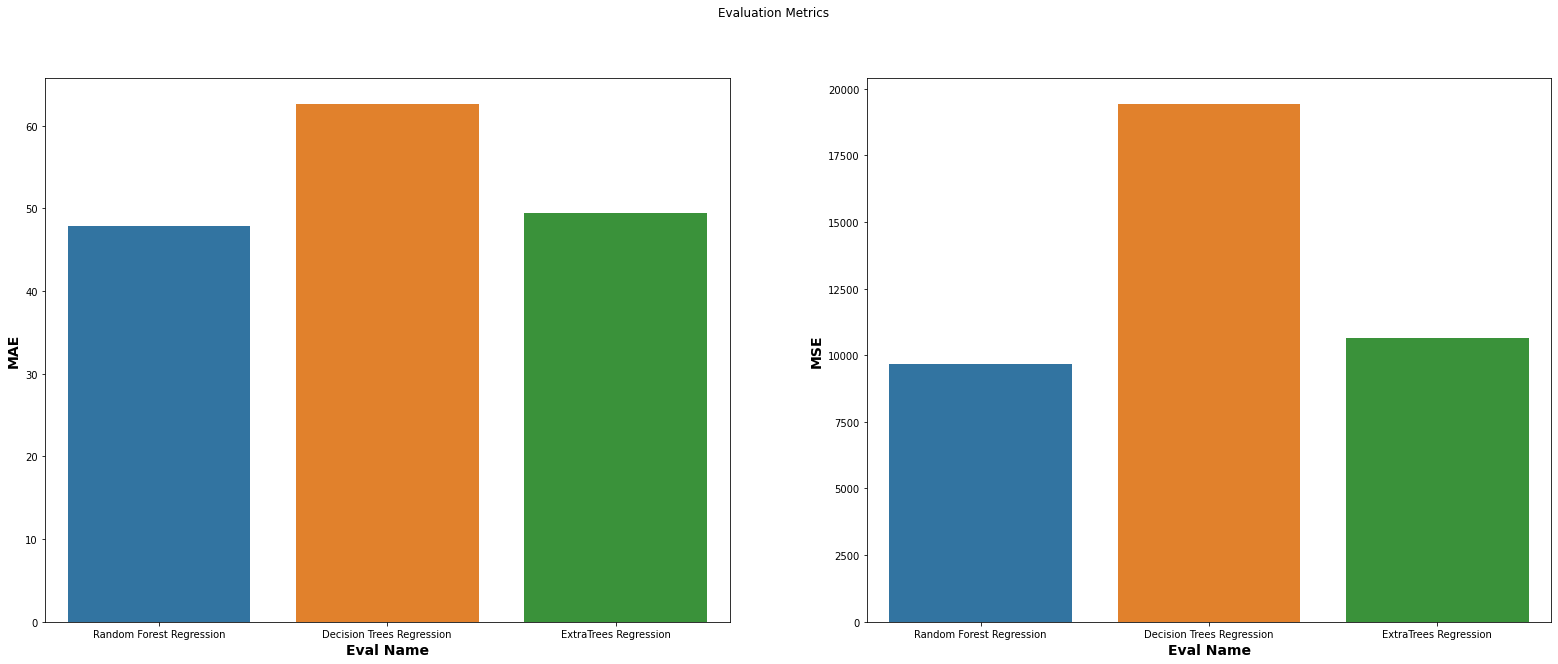

In [185]:
# mean absolute error graph
fig = plt.figure(figsize=(27,10))
plt.subplot(1,2,1)
plt.suptitle('Evaluation Metrics')
plt.ylabel("Result", fontsize=14, fontweight= "bold")
plt.xlabel("Metrics Name", fontsize=14, fontweight= "bold")
sns.barplot(Eval_table["Eval Name"], Eval_table["MAE"])

plt.subplot(1, 2, 2)
plt.suptitle('Evaluation Metrics')
plt.ylabel("Result", fontsize=14, fontweight= "bold")
plt.xlabel("Metrics Name", fontsize=14, fontweight= "bold")
sns.barplot(Eval_table["Eval Name"],Eval_table["MSE"])
plt.show()

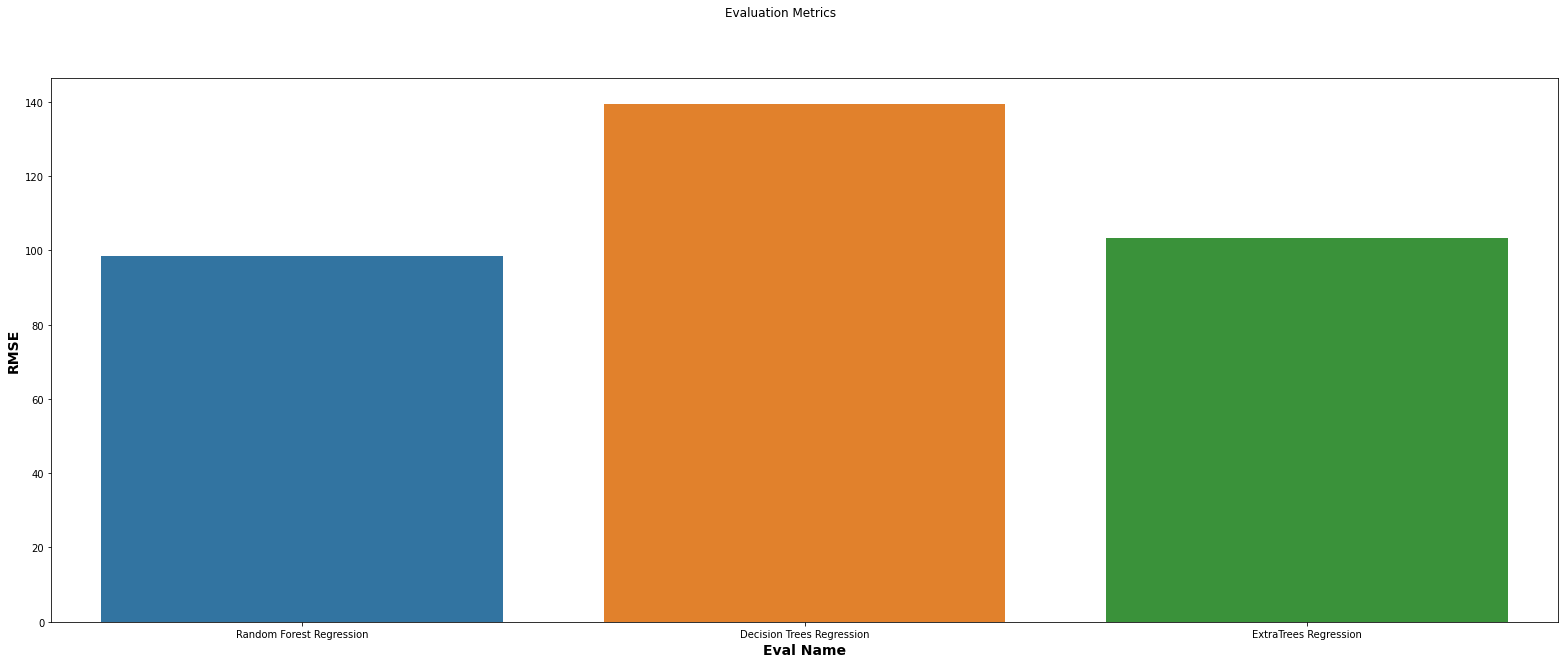

In [290]:
# root mean squared error graph
fig = plt.figure(figsize=(27,10))
fig.subplots(1)
fig.suptitle('Evaluation Metrics')
plt.ylabel("Result", fontsize=14, fontweight= "bold")
plt.xlabel("Metrics Name", fontsize=14, fontweight= "bold")
sns.barplot(Eval_table["Eval Name"],Eval_table["RMSE"])
plt.show()

The lower the metric the better the performance of the model. 
The graph above shows that random forest performance was better overall.

# ROC AUC SCORE

ROC_AUC SCORE is known to be used  as a metric strictly for classification models. The read in the source cited discusses how to apply on regression models. [Source]('https://towardsdatascience.com/how-to-calculate-roc-auc-score-for-regression-models-c0be4fdf76bb')

In [274]:
from sklearn.metrics import roc_auc_score, roc_curve

In [275]:
def regression_roc_auc_score(y_true, y_pred, num_rounds = 10000):
  """
  Computes Regression-ROC-AUC-score.
  
  Parameters:
  ----------
  y_true: array-like of shape (n_samples,). Binary or continuous target variable.
  y_pred: array-like of shape (n_samples,). Target scores.
  num_rounds: int or string. If integer, number of random pairs of observations. 
              If string, 'exact', all possible pairs of observations will be evaluated.
  
  Returns:
  -------
  rroc: float. Regression-ROC-AUC-score.
  """
  
  import numpy as np
    
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  num_pairs = 0
  num_same_sign = 0
  
  for i, j in _yield_pairs(y_true, num_rounds):
    diff_true = y_true[i] - y_true[j]
    diff_score = y_pred[i] - y_pred[j]
    if diff_true * diff_score > 0:
      num_same_sign += 1
    elif diff_score == 0:
      num_same_sign += .5
    num_pairs += 1
      
  return num_same_sign / num_pairs


def _yield_pairs(y_true, num_rounds):
  """
  Returns pairs of valid indices. Indices must belong to observations having different values.
  
  Parameters:
  ----------
  y_true: array-like of shape (n_samples,). Binary or continuous target variable.
  num_rounds: int or string. If integer, number of random pairs of observations to return. 
              If string, 'exact', all possible pairs of observations will be returned.
  
  Yields:
  -------
  i, j: tuple of int of shape (2,). Indices referred to a pair of samples.
  
  """
  import numpy as np
  
  if num_rounds == 'exact':
    for i in range(len(y_true)):
      for j in np.where((y_true != y_true[i]) & (np.arange(len(y_true)) > i))[0]:
        yield i, j     
  else:
    for r in range(num_rounds):
      i = np.random.choice(range(len(y_true)))
      j = np.random.choice(np.where(y_true != y_true[i])[0])
      yield i, j

In [276]:
# roc_auc_score for random forest
RF_roc_auc = regression_roc_auc_score(test_y, RFy_pred, num_rounds = 10000)
RF_roc_auc

0.77955

In [277]:
# roc_auc_score for decision tree
DCT_roc_auc = regression_roc_auc_score(test_y, DCT_pred, num_rounds = 10000)
DCT_roc_auc

0.71665

In [278]:
# roc_auc_score for extratrees
EXT_roc_auc = regression_roc_auc_score(test_y, EXT_pred, num_rounds = 10000)
EXT_roc_auc

0.78435

In [279]:
# roc_auc_score dataframe
my_table = {'Model Name':  ['Random Forest Regression', 'Decision Trees Regression','ExtraTrees Regression'],
        'roc_auc_score': [RF_roc_auc, DCT_roc_auc, EXT_roc_auc]
           }


Model_table = pd.DataFrame.from_dict(my_table)

Model_table

,Model Name,roc_auc_score
0,Random Forest Regression,0.77955
1,Decision Trees Regression,0.71665
2,ExtraTrees Regression,0.78435


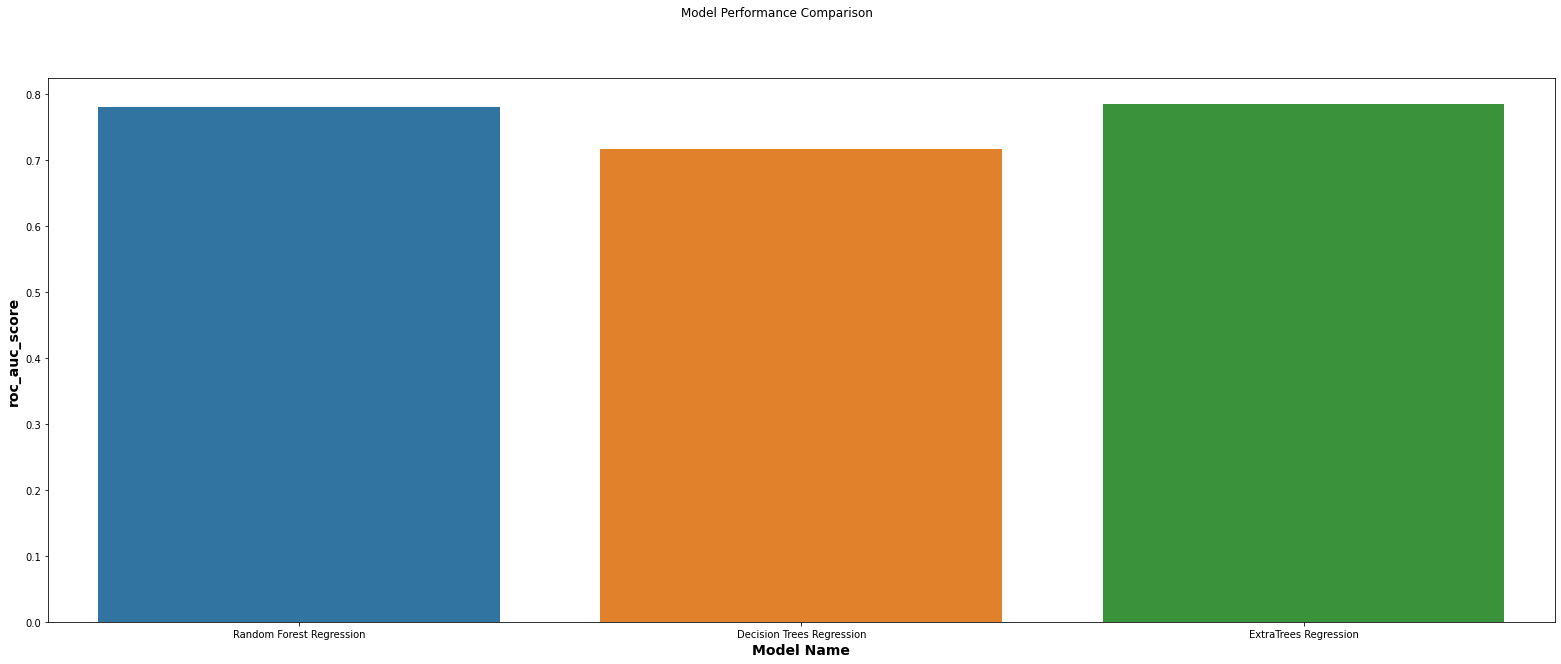

In [294]:
fig = plt.figure(figsize=(27,10))
fig.suptitle('Model Performance Comparison')
plt.ylabel("roc_auc_score", fontsize=14, fontweight= "bold")
plt.xlabel("Model Name", fontsize=14, fontweight= "bold")
ax = sns.barplot(x="Model Name", y="roc_auc_score",data=Model_table)

### Testing the Impact of Dimensionality Reduction on End Product

### Determining the number of component to be used for Dimensionality reduction

Eigen values and vectors are derived to determine the appropriate dimension

In [94]:
#calculating covariance matrix
mean_vec = np.mean(train_X, axis= 0)
cov_mat = (train_X - mean_vec).T.dot((train_X -  mean_vec))/ (train_X[0]-1)
print('Covariance Matrix \n%s' %cov_mat)

Covariance Matrix 
[[-4.98601470e+04  5.70515875e+02  6.30008007e+02 ...  2.46767069e+02
   3.64186737e+02  2.09156737e+03]
 [ 6.20456128e+02 -4.58469247e+04 -1.47375580e+04 ... -2.47909339e+02
   2.94037998e+02  1.23830201e+03]
 [ 6.97377472e+02 -1.50004410e+04 -4.50434565e+04 ... -8.89001169e+01
   3.20439751e+02 -1.95396962e+03]
 ...
 [ 2.74996944e+02 -2.54033040e+02 -8.94996118e+01 ... -4.47417421e+04
  -8.93246755e+01 -4.51726714e+03]
 [ 5.71266626e+02  4.24106413e+02  4.54087208e+02 ... -1.25731909e+02
  -3.17862158e+04 -1.42547101e+04]
 [-6.34951463e+02 -3.45662211e+02  5.35876402e+02 ...  1.23056280e+03
   2.75874992e+03  1.64242249e+05]]


In [95]:
cov_mat = np.cov(train_X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('EigenVectors \n%s' %eig_vecs)
print('EigenValues \n%s' %eig_vals)

EigenVectors 
[[-0.00896144  0.08756818  0.01705312 ... -0.01530521  0.01032401
  -0.00088987]
 [-0.02327449  0.30046422  0.11217941 ...  0.02425893  0.01149534
   0.00386256]
 [-0.03099056  0.33649263  0.13779134 ...  0.01064776 -0.01202433
  -0.00783367]
 ...
 [ 0.00669754  0.00200167  0.01882841 ...  0.22552487 -0.12896593
   0.30321541]
 [-0.01354698 -0.04674287  0.06088582 ...  0.02629192  0.04469349
   0.02121853]
 [-0.01529497  0.01272054 -0.09835962 ...  0.14550413  0.10241224
   0.06550994]]
EigenValues 
[4.17229363 3.13399374 2.31947482 2.23190373 1.61894832 0.01316337
 1.54305723 0.15788351 0.18674051 0.20520266 0.22055859 0.27005585
 0.35320344 0.45451292 0.47759401 0.53325321 1.28261477 0.57094483
 0.61060216 0.65172264 0.67133823 0.69783159 1.17371022 0.78973126
 0.81333878 0.85311699 0.87287506 1.0922899  1.08206758 0.92055995
 1.05813697 1.05494881 0.93684548 1.03618576 1.02856693 0.97074153
 1.01276737 0.97595603 1.00851285 0.98152035 0.98364571 0.98979205
 0.98881019 

In [96]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
print('EigenValues in descending order: ')
for i in eig_pairs:
    print(i[0])

EigenValues in descending order: 
4.172293634719758
3.1339937369928434
2.319474820521111
2.23190373036516
1.6189483223981482
0.013163374772688322
1.5430572324527043
0.15788351314405447
0.1867405090999552
0.20520265828193418
0.22055859216190893
0.2700558511690925
0.35320343693812956
0.454512921879889
0.4775940068187988
0.5332532112295209
1.2826147716104843
0.5709448331399334
0.6106021558994412
0.6517226362139075
0.6713382253018282
0.6978315920472227
1.1737102158821755
0.7897312619405128
0.8133387792849632
0.8531169909077604
0.8728750576566097
1.0922899048036478
1.0820675799025465
0.9205599479488246
1.0581369710847384
1.0549488098390196
0.9368454755988216
1.0361857621801445
1.0285669339262995
0.9707415324306743
1.012767373239407
0.9759560335241451
1.0085128483207506
0.9815203481029674
0.9836457118985213
0.9897920483847029
0.9888101899665097
0.9979958314084393
0.9990318289251624
1.0028177899139248


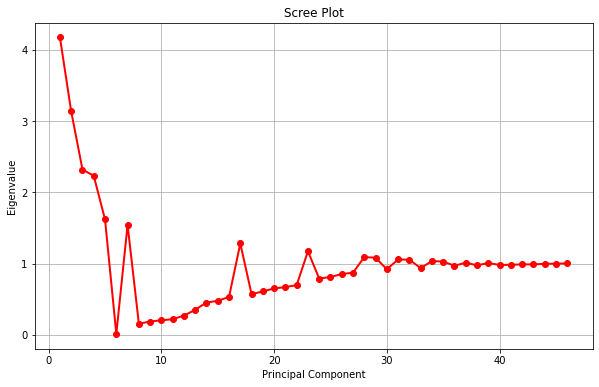

In [97]:
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(eig_vals)) + 1
plt.plot(sing_vals,eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show() 

### Principal Component Analysis
Reason for PCA is to extract the variables that are highly significant and independent of one another in order to reduce the bias in prediction

Doing PCA to reduce the complexity of the algorithm

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 18)
XX_train = pca.fit_transform(train_X)
XX_test = pca.transform(test_X)

In [99]:
classifier = RandomForestRegressor (random_state=1)
classifier.fit(XX_train, train_y)

RandomForestRegressor(random_state=1)

In [100]:
new_RFy_pred = classifier.predict(XX_test)

In [101]:
new_RFy_pred

array([103.95 , 114.9  ,  69.26 , ..., 139.135,  85.66 ,  68.9  ])

In [103]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error (new_RFy_pred, test_y ))

48.01124631291507


Result: The difference between the margin of error between applying <br>
dimensionality reduction to reduce dimensions to 18 and using the 46 features is minute. <br>

Random forest regression model performance is the best overall.